In [24]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
import calendar
from global_land_mask import globe
import glob
import math
from scipy import stats
import os
import netCDF4 as nc

from highres_read import read_var_hires
from myReadGCMsDaily import read_var_mod
from regrid_wght_3d import regrid_wght_wnans

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.clf()
plt.rcParams['figure.figsize'] = (8, 4)


<Figure size 800x400 with 0 Axes>

In [25]:
from con_models import get_cons
con, use_colors, varname, pvarname, modname, warming_modname, hiresmd, amip_md = get_cons()


In [26]:
#latitude range
latr1 = 30
latr2 = 80

gcm_p = 70000


In [27]:
time1=[2010, 1, 1]
time2=[2012, 12, 30]

lats_edges = np.arange(latr1,latr2+1,5)
lons_edges = np.arange(-180,181,5)

#binning
n_bins    = 20
M_range   = (-20,-5.3)
UM_range  = (-8.6,-5.3)
max_c     = 500
bin_count = 1000
bin_coun  = 1000


### DYAMOND UM-5km

In [31]:
d     = np.load('/glade/scratch/geethma/dyamond/UM_5km/uas.npz')
uas   = np.array(d['uas'])
d     = np.load('/glade/scratch/geethma/dyamond/UM_5km/vas.npz')
vas   = np.array(d['vas'])
d     = np.load('/glade/scratch/geethma/dyamond/UM_5km/tas.npz')
tas   = np.array(d['tas'])
d     = np.load('/glade/scratch/geethma/dyamond/UM_5km/ps.npz')
ps    = np.array(d['ps'])
d     = np.load('/glade/scratch/geethma/dyamond/UM_5km/ta.npz')
ta    = np.array(d['ta'])
d     = np.load('/glade/scratch/geethma/dyamond/UM_5km/pfull.npz')
pfull = np.array(d['pfull'])


In [32]:
d      = np.load('/glade/scratch/geethma/dyamond/UM_5km/lats.npz')
d_lat  = np.array(d['lats'])[2559:3628]
d      = np.load('/glade/scratch/geethma/dyamond/UM_5km/lons.npz')
d_lon  = np.array(d['lons'])

In [ ]:
plt.pcolormesh(d_was[0,:,:])
# f = plt.contour(d_CAOI[0,:,:],colors='white',levels=[2,4,6,8,10], linestyles='-')
# g = plt.contour(d_lon_new[-225::],d_lat[520:720],d_CAOI[t,520:720,-225::],colors='white',levels=[-12,-10,-8,-6,-4,-2],linestyles='--')
cbar = plt.colorbar()

In [ ]:
temp[temp > 350] = np.nan

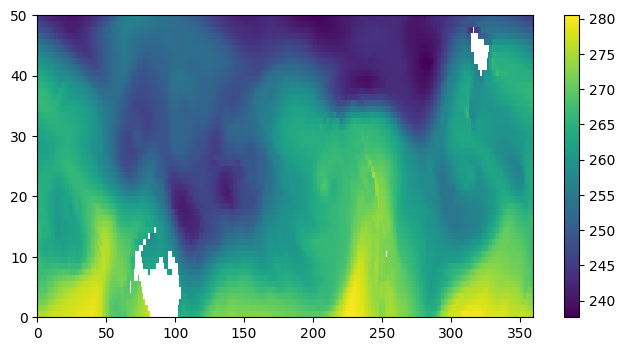

In [18]:
plt.pcolormesh(temp[10,:,:])
cbar = plt.colorbar()

In [34]:
was = np.sqrt(uas**2 + vas**2)

In [35]:
d_lon[d_lon > 180] = d_lon[d_lon > 180]-360

In [36]:
maskm_d = np.ones((len(ps),len(d_lat),len(d_lon)))

for a in range(len(d_lat)):
    for b in range(len(d_lon)):
        if globe.is_land(d_lat[a], d_lon[b])==True:
            maskm_d[:,a,b] = math.nan

In [37]:
d_was = np.array(np.multiply(maskm_d,was))

In [38]:
theta_700_d = np.array(np.multiply(ta, (100000/pfull)**(con)))
theta_sfc_d = np.array(np.multiply(tas, (100000/ps)**(con)))
print('theta_800', np.shape(theta_700_d))
print('theta_sfc', np.shape(theta_sfc_d))


p_CAOI = np.array(np.subtract(theta_sfc_d,theta_700_d))

theta_800 (30, 1069, 5120)
theta_sfc (30, 1069, 5120)


In [39]:
d_CAOI = np.array(np.multiply(maskm_d,p_CAOI))

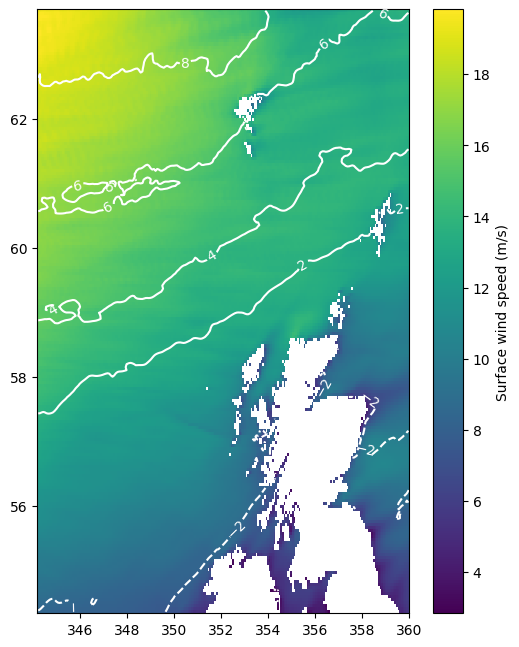

In [169]:
t = 25
for t in [3]:
    fig = plt.figure()
    plt.pcolormesh(d_lon_new[-225::],d_lat[520:720],d_was[t,520:720,-225::])
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Surface wind speed (m/s)')
    f = plt.contour(d_lon_new[-225::],d_lat[520:720],d_CAOI[t,520:720,-225::],colors='white',levels=[2,4,6,8,10], linestyles='-')
    g = plt.contour(d_lon_new[-225::],d_lat[520:720],d_CAOI[t,520:720,-225::],colors='white',levels=[-12,-10,-8,-6,-4,-2],linestyles='--')
    plt.clabel(f, inline=True, fontsize=10)
    plt.clabel(g, inline=True, fontsize=10)
    plt.gcf().set_size_inches(6, 8)
    plt.savefig('../figures/final/UMpcolor.png')
    

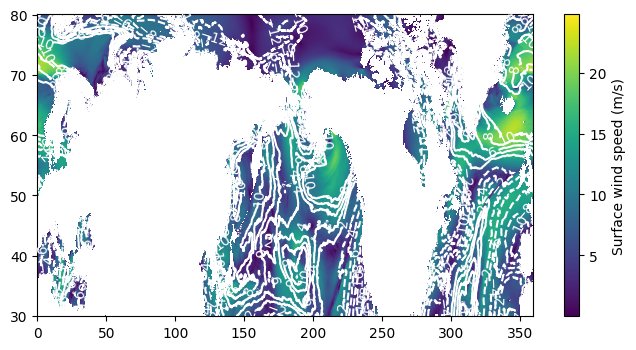

In [114]:
plt.pcolormesh(d_lon_new,d_lat,d_was[15,:,:])
cbar = plt.colorbar()
cbar.ax.set_ylabel('Surface wind speed (m/s)')
f = plt.contour(d_lon_new,d_lat,d_CAOI[15,:,:],colors='white',levels=[2,4,6,8,10], linestyles='-')
g = plt.contour(d_lon_new,d_lat,d_CAOI[15,:,:],colors='white',levels=[-12,-10,-8,-6,-4,-2],linestyles='--')
plt.clabel(f, inline=True, fontsize=10)
plt.clabel(g, inline=True, fontsize=10)
plt.gcf().set_size_inches(8, 4)


In [40]:
d_wind     = regrid_wght_wnans(d_lat,d_lon,d_was,lats_edges,lons_edges)[0]
d_M        = regrid_wght_wnans(d_lat,d_lon,d_CAOI,lats_edges,lons_edges)[0]



/glade/work/geethma/research/codes/regrid_wght_3d.py:46: RuntimeWarning: invalid value encountered in true_divide
  zout[i]=zz[0]/ww[0]


In [41]:
lat_n_d = regrid_wght_wnans(d_lat,d_lon,d_was,lats_edges,lons_edges)[2][:,0]
lon_n_d = regrid_wght_wnans(d_lat,d_lon,d_was,lats_edges,lons_edges)[1][0,:]

In [42]:
ind = np.isnan(d_wind*d_M) == False

In [43]:
from scipy import stats
bin_means_WD, bin_edges_WD, binnumber_WD = stats.binned_statistic(d_M[ind], d_wind[ind], 'mean', bins=20,range=UM_range)
bin_means_MD, bin_edges_MD, binnumber_MD = stats.binned_statistic(d_M[ind], d_M[ind], 'mean', bins=20,range=UM_range)
# bin_means_CD, bin_edges_CD, binnumber_CD = stats.binned_statistic(d_M[ind], d_wind[ind], 'count',bins=n_bins,range=UM_range)



In [44]:
W_SFC_d = np.ma.masked_invalid(bin_means_WD)
M_700_d = np.ma.masked_invalid(bin_means_MD)

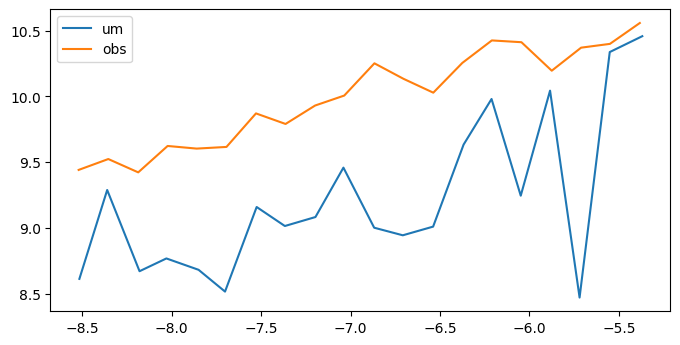

In [57]:
plt.plot(M_700_d, W_SFC_d,label='um')
plt.plot(M_700_O, W_SFC_O,label='obs')
plt.legend()


In [58]:
diff_lat = (d_lat[1]-d_lat[0])**2

In [61]:
diff_lon = (d_lon[1]-d_lon[0])**2

In [64]:
(np.sqrt(diff_lat*diff_lon)) * 110.574

0.364440673828125

## Observations

In [46]:
from obs_data_function import obs
merwind, macwind, temp, sfctemp, sfcpres, p_lev_obs, p_mer_lat, merlon, merlev = obs('surface','T2M', 700, latr1, latr2)

OBSERVATIONS
(1091, 1127)
macwind done


In [47]:
#Mask for the ocean
maskm = np.ones((len(temp),len(p_mer_lat),len(merlon)))

for a in range(len(p_mer_lat)):
    for b in range(len(merlon)):
        if globe.is_land(p_mer_lat[a], merlon[b])==True:
            maskm[:,a,b] = math.nan
##############################


In [48]:
theta_700 = np.array(np.multiply(temp, (100000/(merlev[p_lev_obs]*100))**(con)))
theta_sfc = np.array(np.multiply(sfctemp, (100000/sfcpres)**(con)))

p_CAOI = np.array(np.subtract(theta_sfc,theta_700))



In [49]:
#ocean only mask
plot_CAOI = np.array(np.multiply(maskm,p_CAOI))
plot_wind = np.array(np.multiply(maskm,macwind))




In [50]:
grid_obs_wind     = regrid_wght_wnans(p_mer_lat,merlon,plot_wind,lats_edges,lons_edges)[0]
grid_obs_theta    = regrid_wght_wnans(p_mer_lat,merlon,plot_CAOI,lats_edges,lons_edges)[0]
# grid_obs_temp_sfc = regrid_wght_wnans(p_mer_lat,merlon,sfctemp,lats_edges,lons_edges)[0]
# grid_obs_pres_sfc = regrid_wght_wnans(p_mer_lat,merlon,sfcpres,lats_edges,lons_edges)[0]

lat_n = regrid_wght_wnans(p_mer_lat,merlon,plot_wind,lats_edges,lons_edges)[2][:,0]
lon_n = regrid_wght_wnans(p_mer_lat,merlon,plot_wind,lats_edges,lons_edges)[1][0,:]

/glade/work/geethma/research/codes/regrid_wght_3d.py:46: RuntimeWarning: invalid value encountered in true_divide
  zout[i]=zz[0]/ww[0]


In [51]:
plot_indx = np.isnan(grid_obs_theta*grid_obs_wind)==False
plot_mer_theta = grid_obs_theta[plot_indx]
plot_mac_wind  = grid_obs_wind[plot_indx]

w_sfc = plot_mac_wind[plot_mac_wind>0]
m_700 = plot_mer_theta[plot_mac_wind>0]
# ###################################

In [52]:
from scipy import stats
bin_means, bin_edges, binnumber       = stats.binned_statistic(m_700, w_sfc, 'mean', bins=n_bins, range=M_range)
bin_means_c, bin_edges_c, binnumber_c = stats.binned_statistic(m_700, w_sfc, 'count', bins=n_bins, range=M_range)
bin_means_s, bin_edges_s, binnumber_s = stats.binned_statistic(m_700, w_sfc, 'std', bins=n_bins, range=M_range)
bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(m_700, m_700, 'mean', bins=n_bins, range=M_range)



In [53]:
W_SFC = np.ma.masked_invalid(bin_means[bin_means_c>max_c])
M_700 = np.ma.masked_invalid(bin_means_x[bin_means_c>max_c])
s_err = bin_means_s[bin_means_c>max_c]/np.sqrt(bin_means_c[bin_means_c>max_c])
W_err = np.ma.masked_invalid(s_err)

In [54]:
from scipy import stats
bin_means_WO, bin_edges_WO, binnumber_WO = stats.binned_statistic(m_700, w_sfc, 'mean', bins=20,range=UM_range)
bin_means_MO, bin_edges_MO, binnumber_MO = stats.binned_statistic(m_700, m_700, 'mean', bins=20,range=UM_range)
bin_means_CO, bin_edges_CO, binnumber_CO = stats.binned_statistic(m_700, w_sfc, 'count',bins=20,range=UM_range)

W_SFC_O = np.ma.masked_invalid(bin_means_WO)
M_700_O = np.ma.masked_invalid(bin_means_MO)

In [55]:
d_bias = W_SFC_O - W_SFC_d

In [56]:
np.mean(d_bias)

0.7742304774379829

## GCMs

In [1]:
for j in range(0,len(modname)):
    print(modname[j])
    for i in varname:
        locals()[i+'__'+str(j+1)] = read_var_mod('surface', modname[j], 'historical', i, time1, time2)

    for k in pvarname:
        locals()[k+'__'+str(j+1)] = read_var_mod('p_level', modname[j], 'historical', k, time1, time2)

print('modname done')


In [1]:
mm = len(modname)
for j in range(0,len(hiresmd)):
    print(hiresmd[j],' ', str(j))
    for i in varname:
        locals()[i+'__'+str(j+1+mm)] = read_var_hires('surface', hiresmd[j], 'highresSST-present', i, time1, time2)

    for k in pvarname:
        locals()[k+'__'+str(j+1+mm)] = read_var_hires('p_level', hiresmd[j], 'highresSST-present', k, time1, time2)

print('hires done')


In [ ]:
M_plot  = []
W_plot  = []
W_erro  = []
g_res   = []
 
M_700_G = []
W_SFC_G = []
 
mm      = len(modname)


In [2]:

test_num = 0
for i in range(test_num,mm+len(hiresmd)): #l,mm+len(hiresmd)
    if i<len(modname):
        print(modname[i],str(i))
    else:
        print(hiresmd[i-mm],str(i))

    for j in varname:
        lat  = locals()[j+'__'+str(i+1)][0]
        lon  = locals()[j+'__'+str(i+1)][1]
        time = locals()[j+'__'+str(i+1)][2]

        x_lat = np.array(lat)
        lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr1)).argmin()])[0]
        lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr2)).argmin()])[0]
        lats = lat[lat_ind1[0]:lat_ind2[0]]

        x_lon = lon
        lon = np.array(lon)
        lon[lon > 180] = lon[lon > 180]-360

        maskm = np.ones((len(time),len(lats),len(lon)))

        for a in range(len(lats)):
            for b in range(len(lon)):
                if globe.is_land(lats[a], lon[b])==True:
                    maskm[:,a,b] = math.nan
        #print(j)
        locals()[j+str(i+1)] = locals()[j+'__'+str(i+1)][4]
        locals()[j+str(i+1)] = np.ma.filled(locals()[j+str(i+1)], fill_value=np.nan)
        locals()['plot_'+j+str(i+1)] = np.array(np.multiply(maskm,locals()[j+str(i+1)][:,lat_ind1[0]:lat_ind2[0],:]))
        locals()['grid_'+j+str(i+1)] = regrid_wght_wnans(lats,lon,locals()['plot_'+j+str(i+1)],lats_edges,lons_edges)[0]


    for k in pvarname:
        #print(k)
        lat  = locals()[k+'__'+str(i+1)][0]
        lon  = locals()[k+'__'+str(i+1)][1]
        time = locals()[k+'__'+str(i+1)][2]

        x_lat = np.array(lat)
        lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr1)).argmin()])[0]
        lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr2)).argmin()])[0]
        lats = lat[lat_ind1[0]:lat_ind2[0]]

        x_lon = lon
        lon = np.array(lon)
        lon[lon > 180] = lon[lon > 180]-360

        maskm = np.ones((len(time),len(lats),len(lon)))

        for a in range(len(lats)):
            for b in range(len(lon)):
                if globe.is_land(lats[a], lon[b])==True:
                    maskm[:,a,b] = math.nan
        locals()['plot_levels'+str(i+1)] = locals()['ta__'+str(i+1)][3]
        locals()['grid_'+k+str(i+1)] = []

        levels = locals()['plot_levels'+str(i+1)]

        for p in range(len(levels)):
            if levels[p] == gcm_p:
                #print(levels[p])
                locals()[k+str(i+1)] = locals()[k+'__'+str(i+1)][4]
                locals()[k+str(i+1)] = np.ma.filled(locals()[k+str(i+1)], fill_value=np.nan)
                temp_700   = np.array(np.multiply(maskm,locals()[k+str(i+1)][:,p,lat_ind1[0]:lat_ind2[0],:]))
                grid_t_700 = regrid_wght_wnans(lats,lon,temp_700,lats_edges,lons_edges)[0]
                break;

    g_lat_diff = np.abs(x_lat[1]-x_lat[0])
    g_lon_diff = np.abs(x_lon[1]-x_lon[0])
    g_res.append((np.sqrt(g_lat_diff**2 + g_lon_diff**2)) * 110.574)
    
    theta_700 = grid_t_700*(100000/gcm_p)**con
    theta_t2m = locals()['grid_tas'+str(i+1)]*(100000/locals()['grid_psl'+str(i+1)])**con

    t = min(len(theta_t2m),len(theta_700))
    M_700  = theta_t2m[0:t,:,:] - theta_700[0:t,:,:]
    plot_M = M_700.flatten()
    try_W  = locals()['grid_sfcWind'+str(i+1)][0:t,:,:]
    plot_W = try_W.flatten()

    ind = np.argsort(plot_M)

    final_M = np.sort(plot_M)
    final_W = plot_W[ind]

    indx = np.isnan(final_M*final_W)==False
    
    #for U10 vs M:
    bin_means, bin_edges, binnumber       = stats.binned_statistic(final_M[indx], final_W[indx], 'mean', bins=n_bins,range=M_range)
    bin_means_c, bin_edges_c, binnumber_c = stats.binned_statistic(final_M[indx], final_W[indx], 'count', bins=n_bins,range=M_range)
    bin_means_s, bin_edges_s, binnumber_s = stats.binned_statistic(final_M[indx], final_W[indx], 'std', bins=n_bins,range=M_range)
    bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(final_M[indx], final_M[indx], 'mean', bins=n_bins,range=M_range)

    ind_c = np.where(bin_means_c > max_c)

    std_err = bin_means_s/np.sqrt(bin_means_c)
    M_plot.append(np.ma.masked_invalid(bin_means_x[ind_c])) #[ind_c]
    W_plot.append(np.ma.masked_invalid(bin_means[ind_c]))
    W_erro.append(np.ma.masked_invalid(std_err[ind_c]))
    bin_count = min(bin_count,len(bin_means_c[ind_c]))
    
    #for the bias:
    bin_means_WG, bin_edges_WG, binnumber_WG = stats.binned_statistic(final_M[indx], final_W[indx], 'mean', bins=n_bins,range=M_range)
    bin_means_CG, bin_edges_CG, binnumber_CG = stats.binned_statistic(final_M[indx], final_W[indx], 'count', bins=n_bins,range=M_range)
    bin_means_MG, bin_edges_MG, binnumber_MG = stats.binned_statistic(final_M[indx], final_M[indx], 'mean', bins=n_bins,range=M_range)

    ind_c = np.where(bin_means_CG > max_c)

    M_700_G.append(np.ma.masked_invalid(bin_means_MG[ind_c]))
    W_SFC_G.append(np.ma.masked_invalid(bin_means_WG[ind_c]))
    bin_coun = min(bin_coun,len(bin_means_CG[ind_c]))


        

In [ ]:
print(np.shape(M_OBS))
print(np.shape(W_SFC))
print(np.shape(M_plot))
print(np.shape(W_plot))
print(np.shape(W_SFC_O))
print(np.shape(M_700_O))
print(np.shape(W_SFC_G))
print(np.shape(M_700_G))

In [ ]:
g_res = np.array(g_res)

In [ ]:
H_ind = np.where(g_res<100)[0]
L_ind = np.where(g_res>=300)[0]
M_ind = np.where((g_res >= 100) & (g_res < 300))[0]



In [ ]:
H_res = g_res[H_ind]
L_res = g_res[L_ind]
M_res = g_res[M_ind]

In [ ]:
H_W_SFC_G = []
M_W_SFC_G = []
L_W_SFC_G = []

In [ ]:
for i in H_ind:
    H_W_SFC_G.append(W_SFC_G[i])

for i in M_ind:
    M_W_SFC_G.append(W_SFC_G[i])
    
for i in L_ind:
    L_W_SFC_G.append(W_SFC_G[i])    


In [ ]:
# H_M_700_G = []
# M_M_700_G = []
# L_M_700_G = []

In [ ]:
for i in H_ind:
    H_M_700_G.append(M_700_G[i])

for i in M_ind:
    M_M_700_G.append(M_700_G[i])
    
for i in L_ind:
    L_M_700_G.append(M_700_G[i])    


In [ ]:
print(np.shape(H_W_SFC_G))
print(np.shape(M_W_SFC_G))
print(np.shape(L_W_SFC_G))
print(np.shape(H_M_700_G))
print(np.shape(M_M_700_G))
print(np.shape(L_M_700_G))



In [ ]:
H_M = np.mean(H_M_700_G,axis=0)
M_M = np.mean(M_M_700_G,axis=0)
L_M = np.mean(L_M_700_G,axis=0)
H_W = np.mean(H_W_SFC_G,axis=0)
M_W = np.mean(M_W_SFC_G,axis=0)
L_W = np.mean(L_W_SFC_G,axis=0)

In [ ]:
print(np.shape(H_M))
print(np.shape(M_M))
print(np.shape(L_M))
print(np.shape(H_W))
print(np.shape(M_W))
print(np.shape(L_W))

In [ ]:
H_colors = ['firebrick', 'salmon']
M_colors = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'ghostwhite', 'lavender', 'midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid']
L_colors = ['forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mintcream', 'mediumspringgreen', 'mediumaquamarine', 'aquamarine']


In [ ]:
plt.clf()

plt.fill_between([-8.6,-5.3],[5,5],[11.5,11.5],color='grey',alpha=0.2)
plt.annotate(xy=(-8.3,11), text='Unstable CAOI',color='grey',fontsize=9)

c = 0
for i in H_ind:
    print(i)
    plt.plot(M_plot[i], W_plot[i], color=H_colors[c], alpha=0.2)
    c=c+1

c = 0
for i in M_ind:
    plt.plot(M_plot[i], W_plot[i], color=M_colors[c], alpha=0.2)
    c=c+1

c = 0
for i in L_ind:
    plt.plot(M_plot[i], W_plot[i], color=L_colors[c], alpha=0.2)
    c=c+1
    

plt.plot(H_M, H_W, color='red')
plt.plot(M_M, M_W, color='darkblue')
plt.plot(L_M, L_W, color='darkgreen')

plt.annotate(xy=(H_M[-1],H_W[-1]), text='H-res', color='red',fontsize=10)
plt.annotate(xy=(M_M[-1],M_W[-1]), text='M-res', color='darkblue',fontsize=10)
plt.annotate(xy=(L_M[-1],L_W[-1]), text='L-res', color='darkgreen',fontsize=10)
    
plt.plot(M_OBS, W_SFC, color='black',linestyle='--',linewidth=2)
plt.scatter(M_OBS, W_SFC, color='black',marker='x')
plt.annotate(xy=(M_OBS[-1],W_SFC[-1]), text='Observations', color='black',fontsize=10)
plt.ylabel('U10 [m/s]')
# plt.xticks(np.arange(80,470,40))
plt.xlabel('M [K]')
plt.title('Mean U10 vs CAOI')
plt.savefig('../figures/final/LMH_UvsM.png')

In [ ]:
plt.clf()

for i in range(len(modname)):
    plt.plot(M_plot[i], W_plot[i], color=use_colors[i], alpha=0.2)
    
for i in range(mm,mm+len(hiresmd)):
    plt.plot(M_plot[i], W_plot[i], color=use_colors[i], alpha=0.2)

plt.plot(H_M, H_W, color='red')
plt.plot(M_M, M_W, color='darkblue')
plt.plot(L_M, L_W, color='darkgreen')

plt.annotate(xy=(H_M[-1],H_W[-1]), text='H-res', color='red',fontsize=10)
plt.annotate(xy=(M_M[-1],M_W[-1]), text='M-res', color='darkblue',fontsize=10)
plt.annotate(xy=(L_M[-1],L_W[-1]), text='L-res', color='darkgreen',fontsize=10)
    
plt.plot(M_OBS, W_SFC, color='black',linestyle='--',linewidth=2)
plt.scatter(M_OBS, W_SFC, color='black',marker='x')
plt.annotate(xy=(M_OBS[-1],W_SFC[-1]), text='Observations', color='black',fontsize=10)
plt.ylabel('U10 [m/s]')
# plt.xticks(np.arange(80,470,40))
plt.xlabel('M [K]')
plt.title('Mean U10 vs CAOI')
plt.savefig('../figures/final/LMH_UvsM.png')